# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
from scipy import stats 
import numpy as np

In [2]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [3]:
from scipy.stats import ttest_1samp,ttest_ind

In [5]:
from scipy.stats import ttest_1samp 
import numpy as np
print(GPU1)
gpu1_mean = np.mean(GPU1)
print(gpu1_mean)

t_stat, p_val = stats.ttest_1samp(GPU1, 0)
# print('P Value %1.3f' % p_val)   
print("P-Value",p_val)

if p_val < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

[11  9 10 11 10 12  9 11 12  9 11 12  9 10  9]
10.333333333333334
P-Value 7.228892044970457e-15
 we are rejecting null hypothesis


In [ ]:
# Here p-value is less than significance level of 0.05 => Hence reject null hypothesis
# This means accept alternate hypothesis 

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [27]:
# Alpha = Significnce level = 5% = 0.05
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU2,equal_var = False)
print('P Value %1.3f' % p_value)    

P Value 0.014


In [ ]:
#Here p-value is less that 0.05, hence null hypothesis can be rejected 
#This means there is significant difference in two datasets 

## Question 3

He is trying a third GPU - GPU3.

In [16]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [29]:
# Alpha = Significnce level = 5% = 0.05
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU3)
print('P Value %1.3f' % p_value)    

P Value 0.145


In [ ]:
#Here p-value is greater than 0.05, hence null hypothesis can not be rejected 
#This means there is no significant difference between speeds of GPU1 and GPU3

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [30]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [32]:
from scipy.stats import levene
levene(e1,e2,e3)

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

In [33]:
# Here p-value of levene test is greater than 0.05 => This means null hypothesis cannot be rejected 
# Variances are equal for all 3

In [ ]:
# Null Hypothesis - The results for all three experiments are not significantly different.
# Alternate Hypothesis - The results for all three experiments are significantly different.

In [49]:
import pandas as pd
e = pd.DataFrame()

df1            = pd.DataFrame({'Exp': '1', 'Exp_Value':e1})
df2            = pd.DataFrame({'Exp': '2', 'Exp_Value':e2})
df3            = pd.DataFrame({'Exp': '3', 'Exp_Value':e3})

e = e.append(df1) 
e = e.append(df2) 
e = e.append(df3) 

In [59]:
e

,Exp,Exp_Value
0,1,1.595440
1,1,1.419730
2,1,0.000000
3,1,0.000000
0,2,1.433800
1,2,2.079700
2,2,0.892139
3,2,2.384740
0,3,0.036930
1,3,0.938018


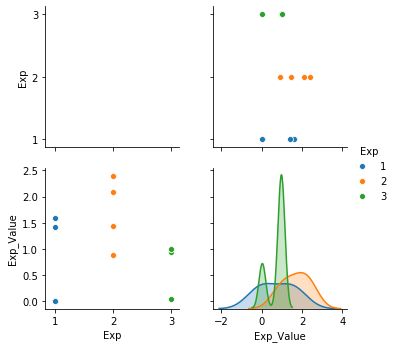

In [51]:
import seaborn as sns
sns.pairplot(e,diag_kind='kde',hue='Exp')

In [52]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Exp_Value ~ Exp', data = e).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq   df         F    PR(>F)
Exp       2.399066  2.0  2.513576  0.135746
Residual  4.294994  9.0       NaN       NaN


In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(e["Exp_Value"],e["Exp"]))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.9438  0.185 -0.4189 2.3065  False
     1      3  -0.0093    0.9  -1.372 1.3534  False
     2      3  -0.9531 0.1799 -2.3158 0.4096  False
---------------------------------------------------


In [ ]:
# p-value of 0.135746 is greater than 0.05, this means we cant reject null hypothesis. 
# Exp(1,2), (1,3) and (2,3) pairs cant reject null hypothesis 
# This proves the results for all three experiments are not significantly different.

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [67]:
from scipy.stats import f_oneway
F, p = f_oneway(e.loc[e.Exp == '1'],e.loc[e.Exp == '2'],e.loc[e.Exp == '3'])
print(F,p)

[-4.05323966e+16  2.51357623e+00] [       nan 0.13574645]


In [ ]:
#here p-value > 0.05 => This means we cant reject null hypothesis

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

answer here

In [ ]:
#Type I error is the rejection of a true null hypothesis, while a type II error is the non-rejection of a false null hypothesis

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


answer here

In [ ]:
# Null Hypothesis - The waiting time to place an order in past month is same from its previous population mean value of 4.5 minutes.
# OR
# Past month Waiting time for Sample mean = Waiting time of previous Population mean = 4.5 mins

# Alternate Hypothesis - The waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes.
# OR
# Past month Waiting time for Sample mean != Waiting time of previous Population mean != 4.5 mins

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [14]:
import numpy as np
# Here d1 to d6 are the number of dice and four values in each dice represents value of dice for player 1 to player 4

d1 = [1, 6, 3, 4]
d2 = [2, 5, 1, 3]
d3 = [4, 2, 3, 1]
d4 = [3, 4, 1, 2]
d5 = [1, 6, 3, 5]
d6 = [3, 2, 2, 1]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [15]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dice)

In [16]:
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 11.44500 P value 0.720458 Degrees of freedom 15


In [17]:
print("===Contingency Table===", exp_freq)

===Contingency Table=== [[2.88235294 5.14705882 2.67647059 3.29411765]
 [2.26470588 4.04411765 2.10294118 2.58823529]
 [2.05882353 3.67647059 1.91176471 2.35294118]
 [2.05882353 3.67647059 1.91176471 2.35294118]
 [3.08823529 5.51470588 2.86764706 3.52941176]
 [1.64705882 2.94117647 1.52941176 1.88235294]]


In [ ]:
# P-value is greater than 0.01 threshold 

## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [90]:
z_scores=stats.zscore(dice)
z_scores

array([[-1.20604538,  1.09454091,  0.92847669,  0.89442719],
       [-0.30151134,  0.4975186 , -1.29986737,  0.2236068 ],
       [ 1.50755672, -1.29354835,  0.92847669, -1.11803399],
       [ 0.60302269, -0.09950372, -1.29986737, -0.4472136 ],
       [-1.20604538,  1.09454091,  0.92847669,  1.56524758],
       [ 0.60302269, -1.29354835, -0.18569534, -1.11803399]])

In [87]:
df_dice=pd.DataFrame(dice)
df_dice

,0,1,2,3
0,1,6,3,4
1,2,5,1,3
2,4,2,3,1
3,3,4,1,2
4,1,6,3,5
5,3,2,2,1


In [99]:
from scipy import stats
p_values = stats.norm.sf(abs(z_scores)) #one-sided
print('p-values')
print(p_values)
print('mean of p_value array',p_value.mean())

p-values
[[0.1139     0.13685891 0.17658018 0.18554668]
 [0.3815123  0.3094117  0.09682322 0.41153164]
 [0.06583401 0.09791074 0.17658018 0.13177624]
 [0.2732468  0.46036917 0.09682322 0.32736042]
 [0.1139     0.13685891 0.17658018 0.05876243]
 [0.2732468  0.09791074 0.42634184 0.13177624]]
mean of p_value array 0.720458335452983


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [8]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [9]:
Dif = after - before 
import  scipy.stats  as stats  
t_statistic, p_value  =  stats.ttest_1samp(Dif, 0)
print('P Value %1.3f' % p_value)  

P Value 0.000


OR

In [73]:
from scipy.stats import ttest_rel
two_sample=ttest_rel(after,before)
two_sample

Ttest_relResult(statistic=-7.158850799722552, pvalue=2.927951560728466e-12)

In [ ]:
# p-value<alpha(0.05) => This means we reject null hypothese => This means There is significance difference 
# between before and after treatment